# MDI 720 : Statistiques
## IntroStatisics
### *Joseph Salmon*

This notebook reproduces the pictures for the course "LeastSquare_1D_fr"

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn import linear_model
import seaborn as sns
from os import mkdir, path
from sklearn import preprocessing
from random import shuffle, seed
import matplotlib.animation as animation
%matplotlib inline
from IPython.display import HTML

# Plot initialization


In [2]:
dirname = "../srcimages/"
if not path.exists(dirname):
    mkdir(dirname)

imageformat = '.pdf'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.axes_style()
sns.set_style({'legend.frameon': True})
color_blind_list = sns.color_palette("colorblind", 8)
my_orange = color_blind_list[2]
my_green = color_blind_list[1]
my_blue = color_blind_list[0]

plt.close("all")

# Saving display function

In [3]:
saving = False

def my_saving_display(fig, dirname, filename, imageformat):
    """"Saving with personal function."""
    filename = filename.replace('.', 'pt')  # remove "." to avoid floats issues
    if saving is True:
        dirname + filename + imageformat
        image_name = dirname + filename + imageformat
        fig.savefig(image_name)

# Load data

In [4]:
url = 'http://josephsalmon.eu/enseignement/TELECOM/MDI720/cars.csv'
# url = 'https://forge.scilab.org/index.php/p/rdataset/source/file/master/csv/datasets/cars.csv'
dat = pd.read_csv(url)

print(dat.describe())

y = dat['dist']
X = dat[['speed']]  # Beware dat['speed'].shape = (50,), issue with sklearn API
n_sample, _ = X.shape


       Unnamed: 0      speed        dist
count    50.00000  50.000000   50.000000
mean     25.50000  15.400000   42.980000
std      14.57738   5.287644   25.769377
min       1.00000   4.000000    2.000000
25%      13.25000  12.000000   26.000000
50%      25.50000  15.000000   36.000000
75%      37.75000  19.000000   56.000000
max      50.00000  25.000000  120.000000


# Data only

/Users/clementtailleur/Documents/Telecom/Statistics/Py3_Statistics/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


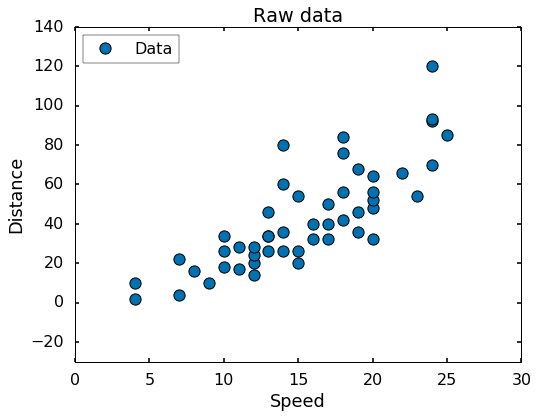

In [5]:
## Added for Python3
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
plt.rcParams["text.usetex"] = False
##

xlabels = 'Speed'
ylabels = 'Distance'

fig1 = plt.figure(figsize=(8, 6))
plt.xlabel(xlabels)
plt.ylabel(ylabels)
plt.title('Raw data')
plt.plot(X, y, 'o', label="Data", markeredgecolor='k', markeredgewidth=1)
axes = plt.gca()
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
#plt.tight_layout()
#plt.show()

#my_saving_display(fig1, dirname, "cars_data_plot", imageformat)

# Data and OLS estimator

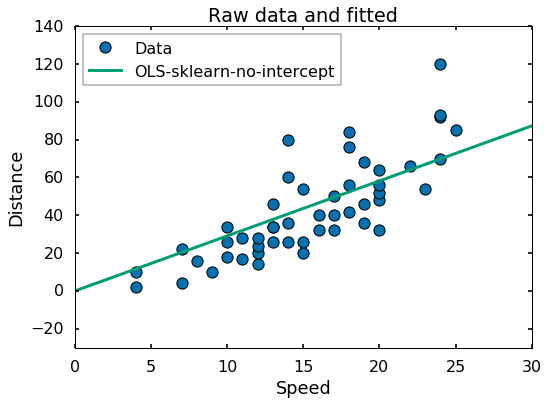

In [12]:
# Fit regression model (with statsmodels)
sm_linmod = sm.OLS(y, X).fit()

# Fit regression model (with sklearn)
skl_linmod = linear_model.LinearRegression()
skl_linmod.fit(X, y)

# Fit regression model without intercept (with sklearn)
skl_linmod_no_inter = linear_model.LinearRegression(fit_intercept=False)
skl_linmod_no_inter.fit(X, y)

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)
plt.plot(X, y, 'o', label="Data", markeredgecolor='k', markeredgewidth=1)
X_to_predict = np.linspace(0.0, 30.0, num=50).reshape(50, 1)
X_to_predict = pd.DataFrame(X_to_predict, columns=['speed'])

plt.plot(X_to_predict, skl_linmod_no_inter.predict(X_to_predict),
         linewidth=3, label="OLS-sklearn-no-intercept")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data and fitted')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_data_plot_regression_no_inter",
                  imageformat)

# Residuals

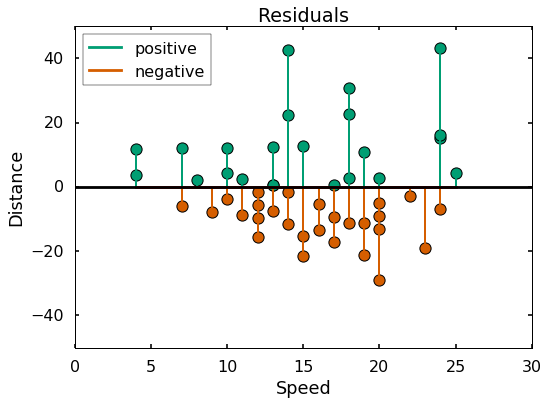

In [13]:
residual = y - skl_linmod.predict(X)

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-50, ymax=50)
plt.xlabel(xlabels)
plt.ylabel(ylabels)

legend_names = ['positive', 'negative']
plots = []
proxies = []

# Positive residuals
positive_res = residual > 0
markerline, stemlines, baseline = plt.stem(X[positive_res],
                                           residual[positive_res])
plots.append((markerline, stemlines, baseline))
plt.setp(stemlines, linewidth=2, color=my_green)   # set stems colors
plt.setp(markerline, 'markerfacecolor', my_green, markeredgecolor='k',
         markeredgewidth=1)    # make points green
h, = plt.plot(1, 1, color=my_green)
proxies.append(h)
plt.legend(proxies, legend_names, numpoints=1, loc=2)

# Negative residuals
negative_res = residual <= 0
markerline, stemlines, baseline = plt.stem(X[negative_res],
                                           residual[negative_res])
plots.append((markerline, stemlines, baseline))
plt.setp(stemlines, linewidth=2, color=my_orange)   # set stems colors
plt.setp(markerline, 'markerfacecolor', my_orange, markeredgecolor='k',
         markeredgewidth=1)    # make points orange

h, = plt.plot(1, 1, color=my_orange)
proxies.append(h)
plt.legend(proxies, legend_names, numpoints=1, loc=2)

plt.title('Residuals')
plt.axhline(y=0, ls='-', color='k')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_data_plot_regression_residual",
                  imageformat)

# Histogram residuals


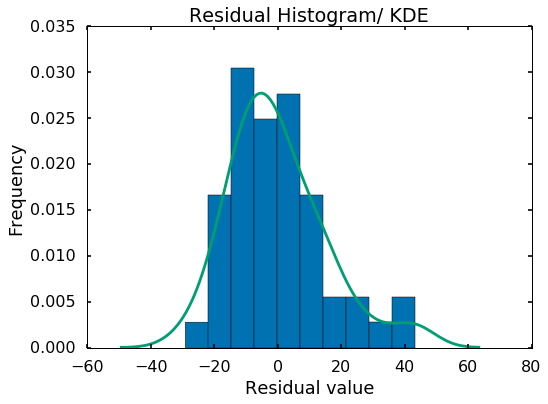

In [14]:
fig = plt.figure(figsize=(8, 6))
plt.hist(residual, bins=10, normed=True, align='mid')
sns.kdeplot(residual)
plt.title('Residual Histogram/ KDE')
ax = plt.gca()
ax.legend_ = None
plt.xlabel('Residual value'), plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_residual_hist", imageformat)

# OLS with intercept


In [ ]:
X_with_cst = sm.add_constant(X)
sm_linmod = sm.OLS(y, X_with_cst).fit()

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)

X_to_predict_with_cst = sm.add_constant(X_to_predict)


plt.plot(X, y, 'o', label="Data", markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict, skl_linmod.predict(X_to_predict), linewidth=3,
         label="OLS-sklearn-w-intercept")
plt.plot(X_to_predict, sm_linmod.predict(X_to_predict_with_cst), '*',
         linewidth=3, label="OLS-sm-w-intercept")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer legend
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data and fitted')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_data_plot_regression",
                  imageformat)

# Second order with intercept = FALSE: physics tell you it is zero !


In [ ]:
X_new = np.reshape(X['speed'].values ** 2, (-1, 1))
skl_linmod_quad = linear_model.LinearRegression(fit_intercept=False)
skl_linmod_quad.fit(X_new, y)

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)

plt.plot(X, y, 'o', label="Data", markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict, skl_linmod_quad.predict(X_to_predict ** 2))
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_data_plot_quad", imageformat)

# Histogram residuals

In [ ]:
residual_quad = y - skl_linmod_quad.predict(X_new)

fig = plt.figure(figsize=(8, 6))
plt.hist(residual_quad, bins=10, normed=True, align='mid')
sns.kdeplot(residual_quad)
plt.title('Residual Histogram/ KDE')
ax = plt.gca()
ax.legend_ = None
plt.xlabel('Residual value'), plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname, "cars_quad_residual_hist", imageformat)


In [ ]:
# With intercept and center of mass displayed

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=-30, ymax=140)

plt.plot(X, y, 'o', label="Data", markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict, skl_linmod.predict(X_to_predict),
         color=my_orange, linewidth=3, label="OLS-with-inter")
plt.plot(np.mean(X), np.mean(y), 'or', markeredgewidth=10,
         markeredgecolor=my_orange)
plt.plot([np.mean(X), np.mean(X)], [-30, np.mean(y)],
         color=my_orange, linewidth=1.5, linestyle="--")
plt.plot([0, np.mean(X)], [np.mean(y), np.mean(y)], color=my_orange,
         linewidth=1.5, linestyle="--")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data fitted with intercept and center of mass')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname,
                  "cars_data_plot_regression_intercept_gravity", imageformat)

# With intercept and center of mass displayed + recentering

In [ ]:
Xprime = X - np.mean(X)
yprime = y - np.mean(y)
fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=-15, xmax=15)
plt.ylim(ymin=-85, ymax=85)
plt.plot(X - np.mean(X), y - np.mean(y), 'o', label="Data",
         markeredgecolor='k', markeredgewidth=1)
skl_linmod.fit(Xprime, yprime)
skl_linmod.predict(X_to_predict)
plt.plot(X_to_predict - 15, skl_linmod.predict(X_to_predict - 15),
         color=my_orange, linewidth=3, label="OLS")
plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
plt.plot([0, 0], [-85, 0], color=my_orange, linewidth=1.5,
         linestyle="--")
plt.plot([-15, 0], [0, 0], color=my_orange, linewidth=1.5,
         linestyle="--")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
xlabels = 'Recentered speed'
ylabels = 'Recentered distance'
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Raw data recentered to center of mass')
plt.show()

# Recentered to center of mass + slopes

In [ ]:

fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=-15, xmax=15)
plt.ylim(ymin=-85, ymax=85)
plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
xlabels = 'Recentered speed'
ylabels = 'Recentered distance'
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Average of slopes: weight by importance')

for i in range(n_sample):
    plt.plot([Xprime.loc[i, 'speed'], 0], [yprime.loc[i], 0], color=my_orange,
             linewidth=(Xprime.loc[i, 'speed']) ** 2 / 20.,
             linestyle="-")
    plt.pause(0.1)
    plt.plot(Xprime.loc[i, 'speed'], yprime.loc[i], 'o',
             markeredgecolor='k', markeredgewidth=1, color=my_blue,
             markersize=(Xprime.loc[i, 'speed']) ** 2 / 10.)
plt.show()

my_saving_display(fig, dirname,
                  "cars_data_plot_regression_gravity_weights", imageformat)

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.xlim(xmin=-15, xmax=15)
plt.ylim(ymin=-85, ymax=85)
plt.plot(X_to_predict - 15, skl_linmod.predict(X_to_predict - 15),
         color=my_orange, linewidth=5, label="OLS")
plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
for i in range(n_sample):
    plt.plot([Xprime.loc[i, 'speed'], 0], [yprime.loc[i], 0], color=my_orange,
             linewidth=(Xprime.loc[i, 'speed']) ** 2 / 20.,
             linestyle="-")
    # plt.pause(0.01)
    plt.plot(Xprime.loc[i, 'speed'], yprime.loc[i], 'o',
             markeredgecolor='k', markeredgewidth=1, color=my_blue,
             markersize=(Xprime.loc[i, 'speed']) ** 2 / 10.)

xlabels = 'Recentered speed'
ylabels = 'Recentered distance'
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Average of slopes: weight by importance')
plt.show()

my_saving_display(fig, dirname,
                  "cars_data_plot_regression_gravity_weights_OLS", imageformat)

# Start Movie

In [ ]:
seed(1)
rnd_index = list(range(n_sample))
shuffle(rnd_index)

fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
xlabels = 'Recentered speed'
ylabels = 'Recentered distance'
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Least-squares with sample size ' + '$ n=$' + str(i + 1))
plt.show()

# Line and points creation
line, = ax.plot([],[], color=my_orange, linewidth=5, label="OLS")
point, = ax.plot([], [], 'o', label="Data", markeredgecolor='k',
             markeredgewidth=1, color=my_blue)

# Windows size
ax.set_xlim([-15, 15])
ax.set_ylim([-85, 85])

# Create function for each frame
def animate(i):
    y_small = yprime[rnd_index[0:i + 1]]
    X_small = Xprime.iloc[rnd_index[0:i + 1]]
    skl_linmod.fit(X_small, y_small)
    line.set_data(X_to_predict - 15, skl_linmod.predict(X_to_predict - 15))
    point.set_data(X_small, y_small)
    ax.set_title('Least-squares with sample size ' + '$ n=$' + str(i + 1))
    return line, point

# Save animation in ani
ani = animation.FuncAnimation(fig=fig, func=animate, frames=50, interval=100, blit=True)
plt.show()

In [ ]:
#HTML(ani.to_html5_video())  # Need ffmpeg installed on your machine

# Check the influence of the extreme points (to compare with 3.93)

In [ ]:
print("Slopes estimates:")
for i in range(len(y)):
    if (Xprime.loc[i, 'speed']) ** 2 > 50:
        print(i, (Xprime.loc[i, 'speed']) ** 2, Xprime.loc[i, 'speed'], yprime.loc[i],
              yprime.loc[i] / Xprime.loc[i, 'speed'])
        print("\t")

# With intercept and center of mass + recentering + rescaling

In [ ]:
stdX = np.std(X)
stdY = np.std(y)

Z = (X - np.mean(X)) / stdX
yy = (y - np.mean(y)) / stdY
Z_to_predict = (X_to_predict - np.mean(X)) / stdX

skl_linmod_new = linear_model.LinearRegression(fit_intercept=False)
skl_linmod_new.fit(Z, yy)

fig = plt.figure(figsize=(8, 6))
plt.ylim(-3, 3.5)
plt.xlim(-2.5, 2)
plt.plot(Z, yy, 'o', label="Data", markeredgecolor='k', markeredgewidth=1)
plt.plot(Z_to_predict, skl_linmod_new.predict(Z_to_predict),
         color=my_orange, linewidth=3, label="OLS")
plt.plot(0, 0, 'or', markeredgewidth=10, markeredgecolor=my_orange)
plt.plot([-2.5, 0], [0, 0], color=my_orange, linewidth=1.5, linestyle="--")
plt.plot([0, 0], [-4, 0], color=my_orange, linewidth=1.5, linestyle="--")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
xlabels = 'Recentered and rescaled speed'
ylabels = 'Recentered and rescaled distance'
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Rescaled \& recentered data')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname,
                  "cars_data_plot_regression_gravity_recentered_rescaled",
                  imageformat)

# Compare standardization:

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
Xarray = X.values
print(np.isclose(scaler.mean_, np.mean(Xarray)))
print(np.array_equal(scaler.var_[0], np.var(Xarray)))
print(np.array_equal(scaler.transform(X),
                     (Xarray - np.mean(Xarray)) / np.std(Xarray)))
print(np.array_equal(scaler.transform([[26]]),
                     ([[26]] - np.mean(Xarray)) / np.std(Xarray)))
